In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
x = np.array([1, 1, 2, 3, 2, 0])
y = np.array([0, 1, 1, 2, 3, 2, 1])

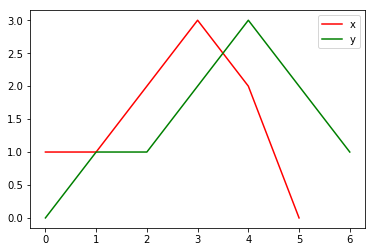

In [3]:
plt.plot(x,'r', label='x')
plt.plot(y, 'g', label='y')
plt.legend()

In [5]:
distances = np.zeros((len(y), len(x)))
distances

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [6]:
for i in range(len(y)):
    for j in range(len(x)):
        distances[i,j] = (x[j]-y[i])**2  

In [7]:
distances

array([[1., 1., 4., 9., 4., 0.],
       [0., 0., 1., 4., 1., 1.],
       [0., 0., 1., 4., 1., 1.],
       [1., 1., 0., 1., 0., 4.],
       [4., 4., 1., 0., 1., 9.],
       [1., 1., 0., 1., 0., 4.],
       [0., 0., 1., 4., 1., 1.]])

In [8]:
def distance_cost_plot(distances):
    im = plt.imshow(distances, interpolation='nearest', cmap='Reds') 
    plt.gca().invert_yaxis()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid()
    plt.colorbar();

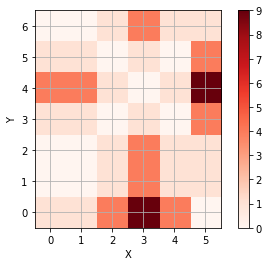

In [9]:
distance_cost_plot(distances)


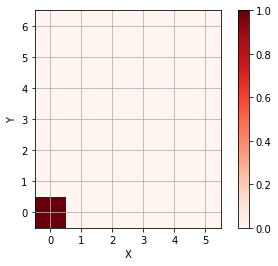

In [11]:
accumulated_cost = np.zeros((len(y), len(x)))
accumulated_cost[0,0] = distances[0,0]
distance_cost_plot(accumulated_cost)

In [12]:
for i in range(1, len(x)):
    accumulated_cost[0,i] = distances[0,i] + accumulated_cost[0, i-1]

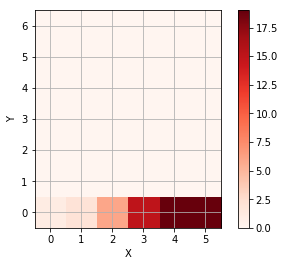

In [13]:
distance_cost_plot(accumulated_cost)


In [14]:
for i in range(1, len(y)):
    accumulated_cost[i,0] = distances[i, 0] + accumulated_cost[i-1, 0]  

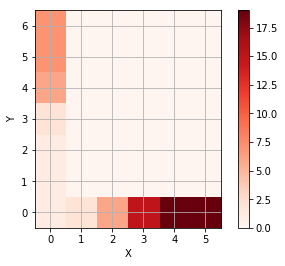

In [15]:
distance_cost_plot(accumulated_cost)


In [16]:
for i in range(1, len(y)):
    for j in range(1, len(x)):
        accumulated_cost[i, j] = min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]) + distances[i, j]

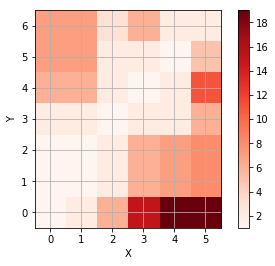

In [17]:
distance_cost_plot(accumulated_cost)


In [20]:
path = [[len(x)-1, len(y)-1]]
i = len(y)-1
j = len(x)-1
while i>0 and j>0:
    if i==0:
        j = j - 1
    elif j==0:
        i = i - 1
    else:
        if accumulated_cost[i-1, j] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
            i = i - 1
        elif accumulated_cost[i, j-1] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
            j = j-1
        else:
            i = i - 1
            j= j- 1
    path.append([j, i])
path.append([0,0])
path

[[5, 6], [4, 5], [3, 4], [2, 3], [1, 2], [1, 1], [0, 1], [0, 0]]

In [21]:
path_x = [point[0] for point in path]
path_y = [point[1] for point in path]

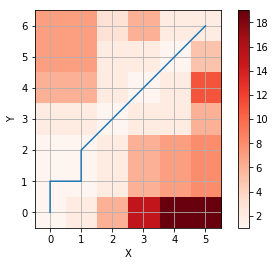

In [22]:
distance_cost_plot(accumulated_cost)
plt.plot(path_x, path_y);

In [23]:
def path_cost(x, y, accumulated_cost, distances):
    path = [[len(x)-1, len(y)-1]]
    cost = 0
    i = len(y)-1
    j = len(x)-1
    while i>0 and j>0:
        if i==0:
            j = j - 1
        elif j==0:
            i = i - 1
        else:
            if accumulated_cost[i-1, j] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
                i = i - 1
            elif accumulated_cost[i, j-1] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
                j = j-1
            else:
                i = i - 1
                j= j- 1
        path.append([j, i])
    path.append([0,0])
    for [y, x] in path:
        cost = cost +distances[x, y]
    return path, cost    

In [25]:
path, cost = path_cost(x, y, accumulated_cost, distances)
print(path)
print(cost)

[[5, 6], [4, 5], [3, 4], [2, 3], [1, 2], [1, 1], [0, 1], [0, 0]]
2.0


5 0 : 6 1
4 2 : 5 2
3 3 : 4 3
2 2 : 3 2
1 1 : 2 1
1 1 : 1 1
0 1 : 1 1
0 1 : 0 0


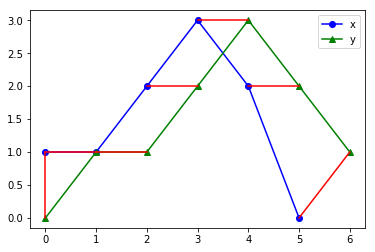

In [30]:
plt.plot(x, 'bo-' ,label='x')
plt.plot(y, 'g^-', label = 'y')
plt.legend();
paths = path_cost(x, y, accumulated_cost, distances)[0]
for [map_x, map_y] in paths:
    print (map_x, x[map_x], ":", map_y, y[map_y])
    
    plt.plot([map_x, map_y], [x[map_x], y[map_y]], 'r')

In [31]:
idx = np.linspace(0, 6.28, 100)
x = np.sin(idx)
y = np.cos(idx)
distances = np.zeros((len(y), len(x)))
for i in range(len(y)):
    for j in range(len(x)):
        distances[i,j] = (x[j]-y[i])**2  


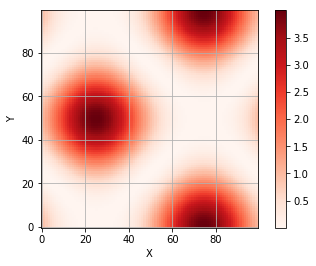

In [32]:
distance_cost_plot(distances)

In [33]:
accumulated_cost = np.zeros((len(y), len(x)))
accumulated_cost[0,0] = distances[0,0]
for i in range(1, len(y)):
    accumulated_cost[i,0] = distances[i, 0] + accumulated_cost[i-1, 0]
for i in range(1, len(x)):
    accumulated_cost[0,i] = distances[0,i] + accumulated_cost[0, i-1] 
for i in range(1, len(y)):
    for j in range(1, len(x)):
        accumulated_cost[i, j] = min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]) + distances[i, j]

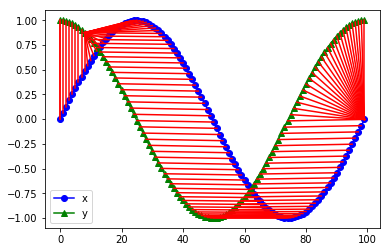

In [34]:
plt.plot(x, 'bo-' ,label='x')
plt.plot(y, 'g^-', label = 'y')
plt.legend();
paths = path_cost(x, y, accumulated_cost, distances)[0]
for [map_x, map_y] in paths:
    #print map_x, x[map_x], ":", map_y, y[map_y]
    
    plt.plot([map_x, map_y], [x[map_x], y[map_y]], 'r')